# Step 4: Engagement Analysis

This notebook aims to deliver insights about the underlying distribution of retweet counts for our data set.

Necessary steps to complete:
1. Load classification and regression labels
2. Calculate summary statistics
3. Visualise class distribution
4. Compare training and validation distributions

## Load labels from file

In [10]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [11]:
from tep.utils import load_array

In [12]:
counts = load_array("data/regression_labels.bc")
classes = load_array("data/classification_labels.bc")
print(counts.shape)
print(classes.shape)

(1293005,)
(1293005,)


## Calculate summary statistics

In [13]:
import pandas as pd

In [14]:
# create data frame from counts
df = pd.DataFrame(data=counts, columns=["num_retweets"])

In [15]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,num_retweets
count,"1,293,005.00"
mean,346.80
std,"4,368.17"
min,0.00
25%,0.00
50%,2.00
75%,15.00
max,"1,702,042.00"


The distribution is obviously skewed, as the mean is larger than the mean.

## Visualise class distribution

In [18]:
from tep.vizUtils import plot_bars

In [19]:
from tep.config import Config
conf = Config()
boundaries = conf.CLASSES
boundaries

[0, 9, 99, 999]

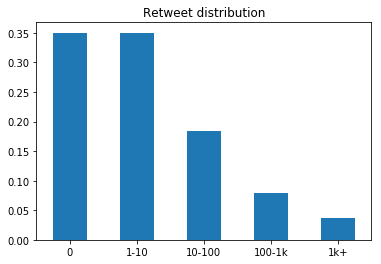

In [20]:
plot_bars(data=counts, classes=boundaries, labels=['0', '1-10', '10-100', '100-1k', '1k+'], title="Retweet distribution")

In [21]:
from tep.utils import class_distribution

In [22]:
class_distribution(classes, "Retweet Class")

0.00    453030
1.00    452309
2.00    236965
3.00    102294
4.00     48407
Name: Retweet Class, dtype: int64

In [23]:
class_distribution(classes, "Retweet class", normalize=True)

0.00   0.35
1.00   0.35
2.00   0.18
3.00   0.08
4.00   0.04
Name: Retweet class, dtype: float64

Classes 1 and 2 are overrepresented in the data set, since less examples are present for larger classes. However, even the smallest class contains nearly 50,000 training examples.
This distribution will be used unchanged (i.e., no sampling applied) during training in order to develop a model suitable for real-world distributions.

## Compare training and validation distributions

In [27]:
VAL_SET_SIZE = 10000
train = classes[:-VAL_SET_SIZE]
val = classes[-VAL_SET_SIZE:]
print(train.shape)
print(val.shape)

(1283005,)
(10000,)


In [28]:
class_distribution(train, "Retweet class", normalize=True)

0.00   0.35
1.00   0.35
2.00   0.18
3.00   0.08
4.00   0.04
Name: Retweet class, dtype: float64

In [29]:
class_distribution(val, "Retweet class", normalize=True)

0.00   0.35
1.00   0.35
2.00   0.18
3.00   0.08
4.00   0.04
Name: Retweet class, dtype: float64

Both distributions are nearly identical, which is what we wanted to see.